<a href="https://colab.research.google.com/github/naveenbreddy/Data-Science-Portfolio-Projects/blob/main/EDA_Movies_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
#using Kaggle API I can pull the dataset directly into colab without having to download it to my computer
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d danielgrijalvas/movies

In [198]:
#import zipfile
#!unzip movies.zip -d /content/

In [199]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

%matplotlib inline

In [200]:
df = pd.read_csv('/content/movies.csv')

In [201]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [202]:
df.shape

(7668, 15)

# Cleaning the data to deal with missing values

In [203]:
#Lets clean the data
#df.isnull().sum()
print(f' % of missing values: {round((df.isnull().sum()/df.shape[0])*100,2)}')

 % of missing values: name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64


In [204]:
#lets look at rating column
df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [205]:
#imputing rating with most repeated 'R' rating
df['rating'].fillna('R', inplace = True)

In [206]:
#df.isnull().sum()
#looking at budget
df['budget'].describe()

count    5.497000e+03
mean     3.558988e+07
std      4.145730e+07
min      3.000000e+03
25%      1.000000e+07
50%      2.050000e+07
75%      4.500000e+07
max      3.560000e+08
Name: budget, dtype: float64

In [207]:
df['budget_bins']=pd.cut(df['budget'], bins = [3000,100000,500000,1000000, 5000000,50000000,100000000, 150000000, 200000000, 300000000, 400000000], 
                         labels = ['3k-100k $','100k-500k $','500k - 1 mil $','1-5 mil $','5 - 50 mil $','50 - 100 mil $','100 - 150 mil $','150-200 mil $','200-300 mil $','300 - 400 mil $'])


In [208]:
df['budget_bins'].head(10)

0      5 - 50 mil $
1         1-5 mil $
2      5 - 50 mil $
3         1-5 mil $
4      5 - 50 mil $
5    500k - 1 mil $
6      5 - 50 mil $
7      5 - 50 mil $
8    50 - 100 mil $
9      5 - 50 mil $
Name: budget_bins, dtype: category
Categories (10, object): ['3k-100k $' < '100k-500k $' < '500k - 1 mil $' < '1-5 mil $' < ... <
                          '100 - 150 mil $' < '150-200 mil $' < '200-300 mil $' < '300 - 400 mil $']

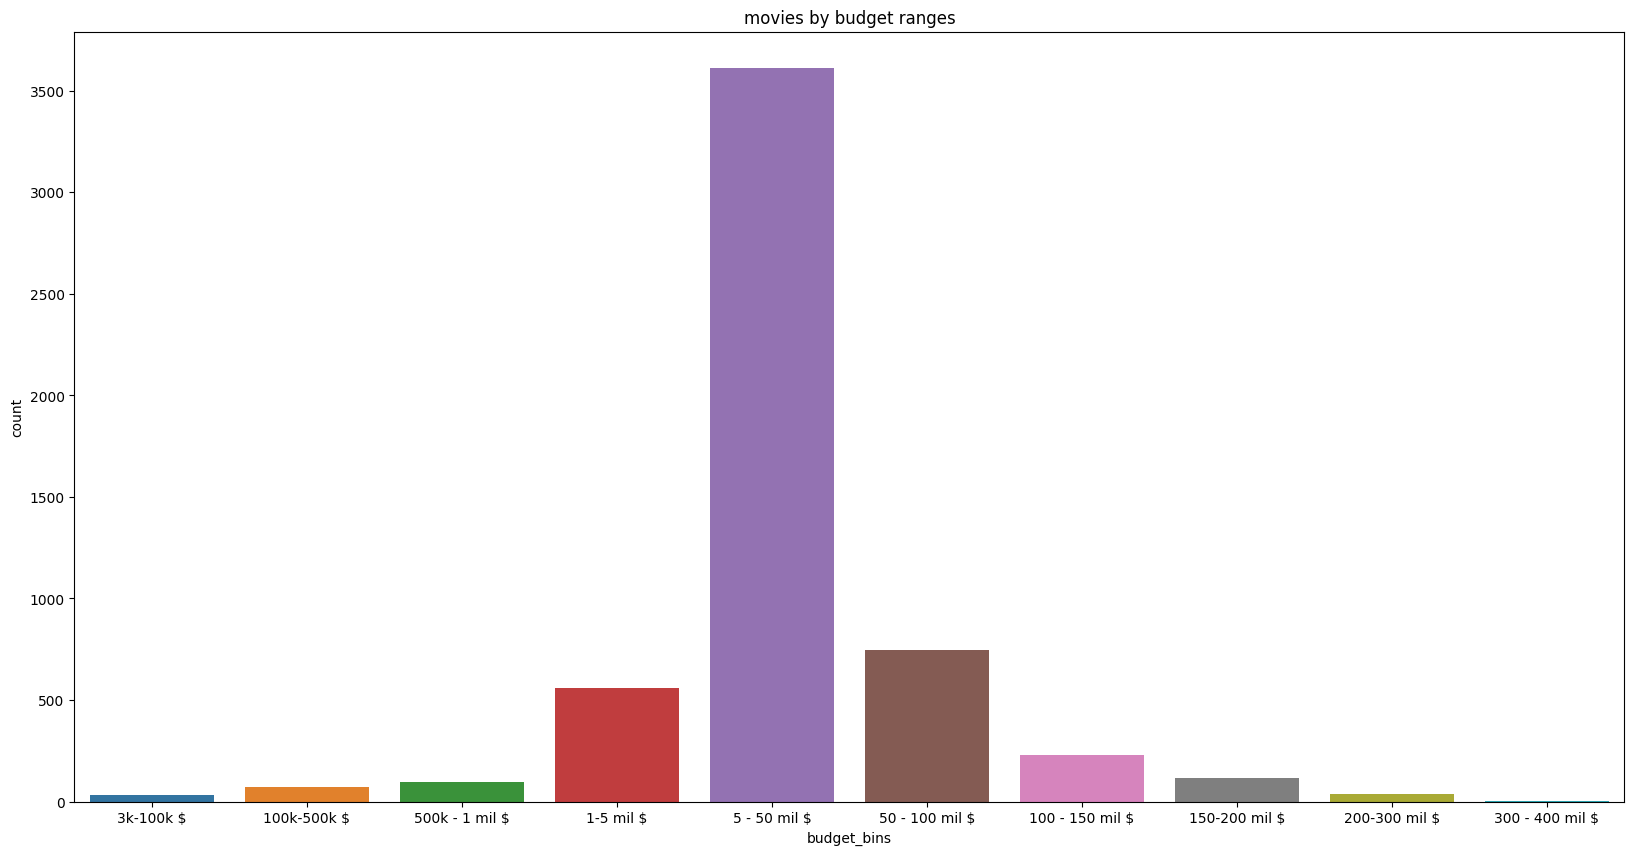

In [209]:
fig, ax = plt.subplots(figsize = (20,10))

ax = sns.countplot(data = df, x = 'budget_bins')
ax.set_title('movies by budget ranges')
fig.show()

<Axes: xlabel='budget', ylabel='Count'>

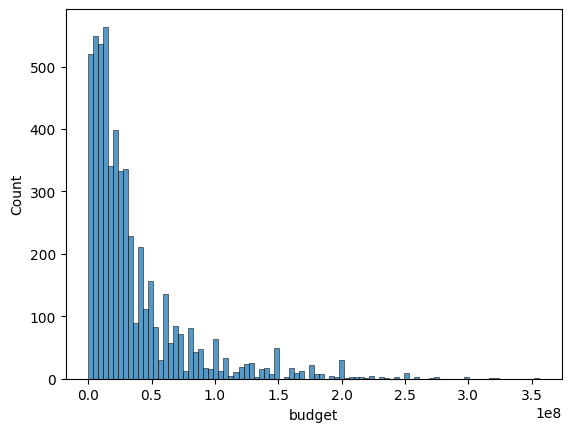

In [210]:
sns.histplot(data = df, x = df['budget'])

In [211]:
#imputing median to budget
a = df['budget'].median()

In [212]:
df['budget'].fillna(a,inplace = True)

In [213]:
#looking at the next missing column
#gross
df['gross'].describe()

#imputing median value into missing
df['gross'].fillna( df['gross'].median(), inplace=True)

In [214]:
df.isnull().sum()

name              0
rating            0
genre             0
year              0
released          2
score             3
votes             3
director          0
writer            3
star              1
country           3
budget            0
gross             0
company          17
runtime           4
budget_bins    2172
dtype: int64

In [215]:
df.drop('budget_bins', axis = 1, inplace = True)

In [216]:
df['company'].mode()

0    Universal Pictures
Name: company, dtype: object

In [217]:
#imputing missing values in company with mode
df['company'].fillna('Universal Pictures', inplace = True)

In [218]:
#dropping all rows with null values now
df = df.dropna()

In [219]:
#df.isnull().sum()
#no more nulls

## Other cleaning

In [220]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [221]:
df['budget'] = df['budget'].astype(np.int64)

In [222]:
df['gross'] = df['gross'].astype(np.int64)

In [223]:
#lets use the released column year as new year because the current column year seems not be totally correlated with the year in released date
df['released_year']=df.released.astype(str).str.split(',',n=1,expand = True)[1].str[0:5]

In [224]:
df['released_year'] = df['released_year'].astype(object)

In [225]:
df.drop('year',axis =1 , inplace = True)

In [226]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


## Looking for correlation among the features

Text(0, 0.5, 'Budget')

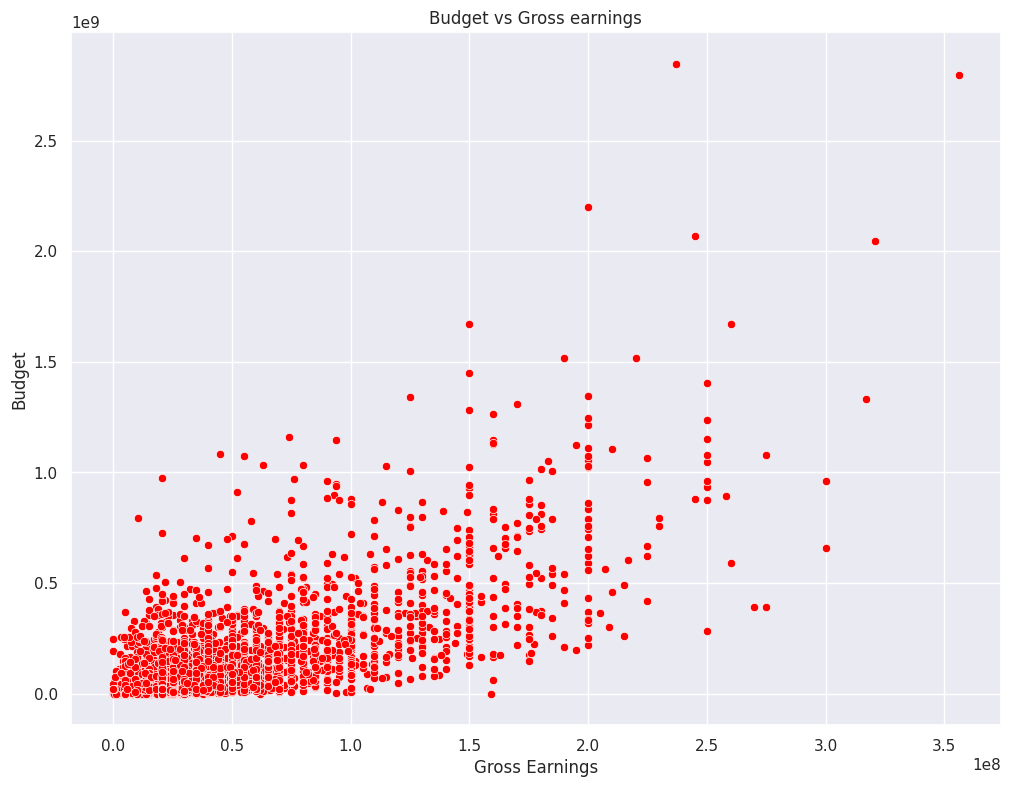

In [236]:
sns.set(rc={'figure.figsize':(12,9)})
sns.scatterplot(x = df['budget'], y = df['gross'], data = df, color = 'red')
plt.title('Budget vs Gross earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')


<Axes: xlabel='budget', ylabel='gross'>

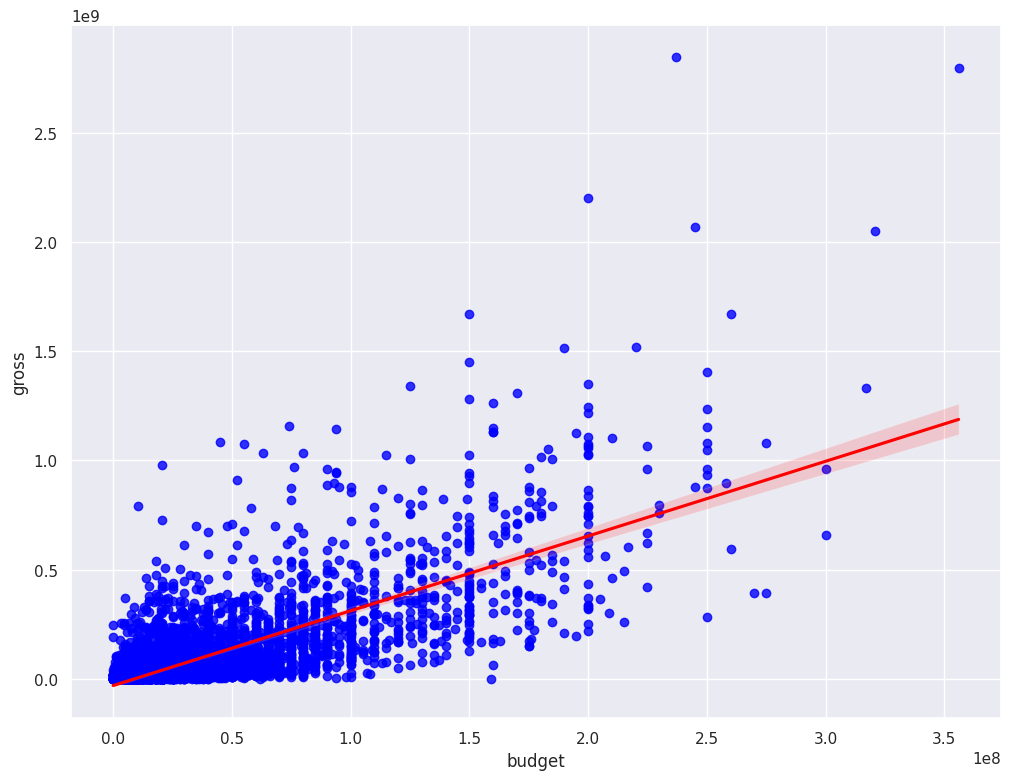

In [244]:
#plot budget vs gross using a regplot

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={'color':'blue'}, line_kws={'color' : 'red'})

<ipython-input-250-4c7c941db922>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-250-4c7c941db922>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


Text(0.5, 1.0, 'Correlation among features')

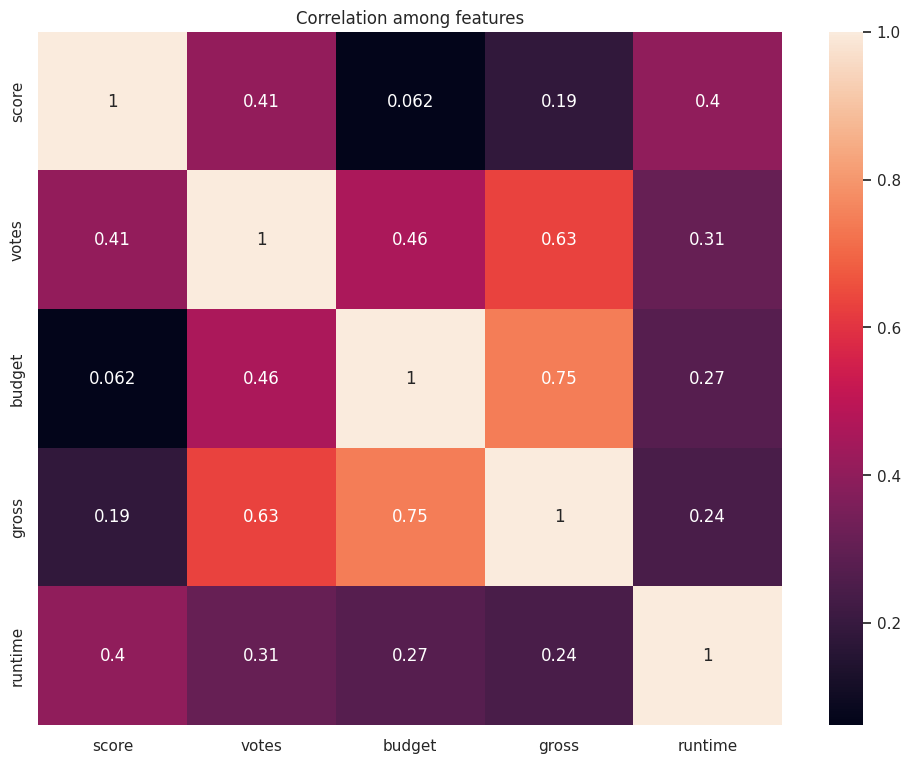

In [250]:
df.corr()
sns.heatmap(df.corr(),annot = True)
plt.title('Correlation among features')

In [253]:
#Lets try to see if the other non-numeric columns are correlated?
# will assign a numeric value to every categorical value in the column

df_numeric = df.copy()

for col_name in df_numeric.columns:
  if (df_numeric[col_name].dtype == 'object'):
    df_numeric[col_name] = df_numeric[col_name].astype('category')
    df_numeric[col_name] = df_numeric[col_name].cat.codes




<Axes: >

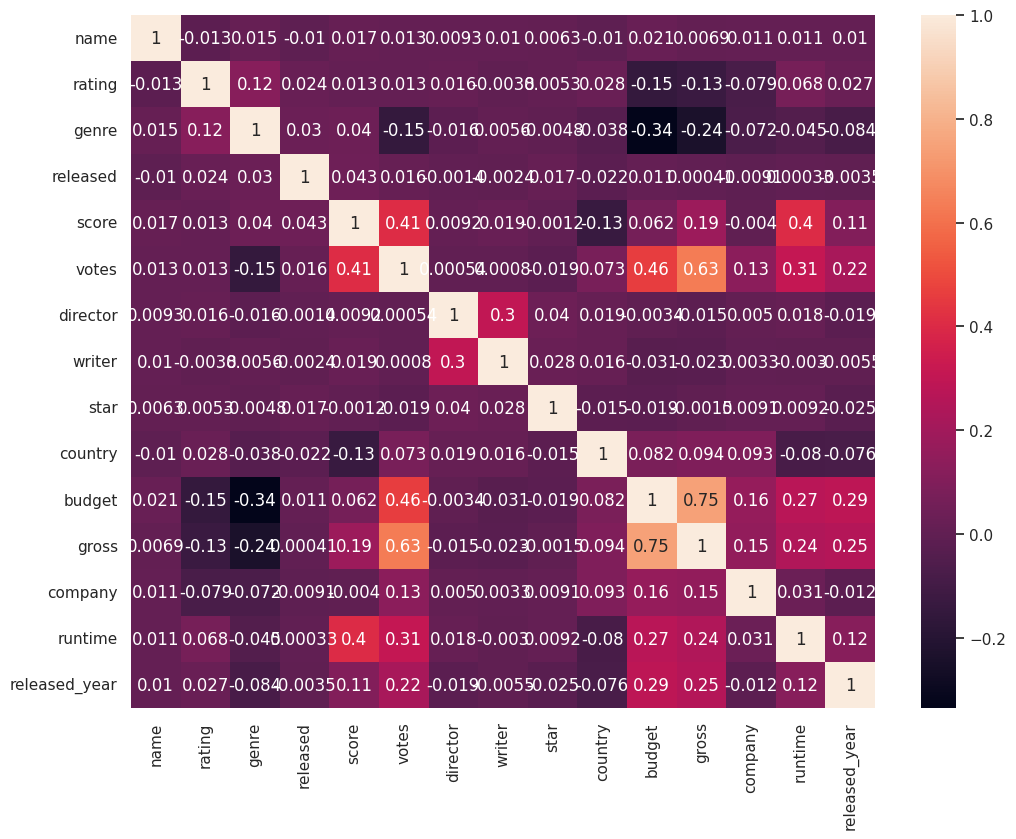

In [254]:
sns.heatmap(df_numeric.corr(),annot = True)

In [259]:
df_numeric.corr().unstack()


name           name             1.000000
               rating          -0.012804
               genre            0.014866
               released        -0.010253
               score            0.016921
               votes            0.013214
               director         0.009271
               writer           0.009960
               star             0.006279
               country         -0.010447
               budget           0.021198
               gross            0.006888
               company          0.010521
               runtime          0.010751
               released_year    0.010333
rating         name            -0.012804
               rating           1.000000
               genre            0.121159
               released         0.023793
               score            0.013377
               votes            0.012956
               director         0.016205
               writer          -0.003843
               star             0.005280
               c

Looks like votes and budget are more correlated to gross than budget alone!